In [10]:
import pandas as pd
from random import random
from math import sqrt

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

## Regression with Gradient Decent

### Perform regression with stochastic gradient descent on the salary data and compare results to standard regression in sklearn.

In [ ]:
salary = pd.read_csv("data/Salary_Data.csv")
salary = salary.sample(len(salary.index))

ix_test = 5
holdout = salary.iloc[:ix_test].reset_index(drop=True)
training = salary.iloc[ix_test:].reset_index(drop=True)

X_hold = holdout.YearsExperience
y_hold = holdout.Salary

X = training.YearsExperience
y = training.Salary

### Implement gradient descent

In [193]:
def gradient_descent(X: pd.Series, y: pd.Series, n_iters: int, learning_rate=0.01, break_early=True):
    
    # 1. Define total_error over all points in data
    total_error = pd.Series(0, index=range(n_iters))
    
    # 2. Initialize b_estimate, m_estimate, and learning_rate
    b_estimate = 0
    m_estimate = 0
    
    # 3. Define step_gradient as
        # a. b_gradient = 0, m_gradient = 0
        # b. loop over all data and obtain values of b_gradient, m_gradient as:
            # b_estimate += learning_rate * b_gradient of i
            # m_estimate += learning_rate * m_gradient of i

    N = len(X.index)
    for i in range(n_iters):
        y_est = X.apply(lambda x: m_estimate * x + b_estimate).values
        est_term =  y_est - y.values
        
        b_term = est_term
        b_gradient = (2/N)*sum(b_term)

        b_estimate -= (learning_rate*b_gradient)
        
        m_term = X.values * est_term
        m_gradient = (2/N)*sum(m_term)   

        m_estimate -= (learning_rate*m_gradient)
    
        total_error[i] = (1/N) * sum(est_term**2)
        
        if break_early and i >0:
            #check error
            threshold = 5e-5
            diff_error = abs(total_error[i-1] - total_error[i])/total_error[i-1]
            if diff_error < threshold:
                total_error = total_error[:i]
                break
        
    return (m_estimate, b_estimate, total_error)

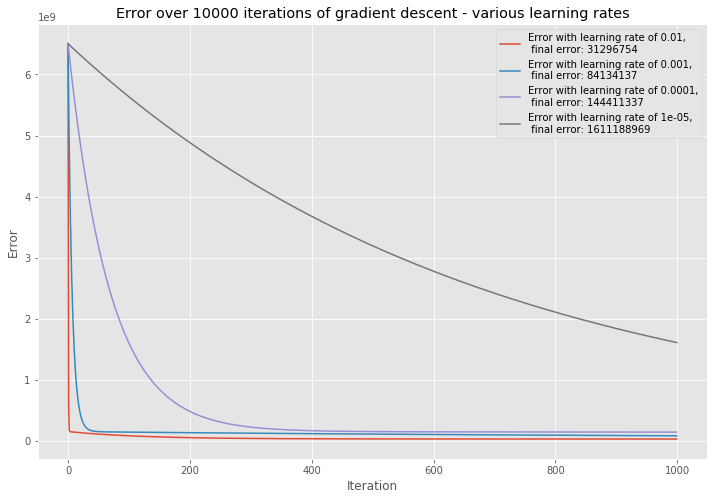

In [167]:
rates = [0.01, 0.001, 0.0001, 0.00001]
# rates = [0.001, 0.0001, 0.00001]
for rate in rates:
    _, _, _error = gradient_descent(salary.YearsExperience, salary.Salary, 1000, learning_rate=rate, break_early=False)
    _error.plot(label="Error with learning rate of {},\n final error: {}".format(rate, _error.values[-1]))
    
plt.title("Error over {} iterations of gradient descent - various learning rates".format(n_iters))
plt.ylabel("Error")
plt.xlabel("Iteration")
plt.legend()
None

---

In [194]:
n_iters = 10000
learning_rate = 0.001
m, b, error = gradient_descent(X, y, n_iters, learning_rate=learning_rate)

In [195]:
print("Result of gradient descent: m = {:.2f}, b = {:.2f}, error = {}".format(m, b, error.values[-1]))

Result of gradient descent: m = 9824.64, b = 23324.00, error = 38166163


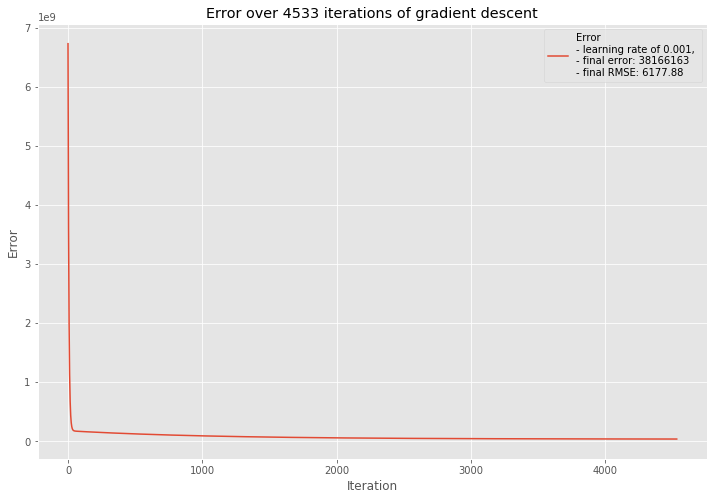

In [200]:
error.plot(label="Error \n- learning rate of {}, \n- final error: {} \n- final RMSE: {:.2f}".format(learning_rate, 
                                                                                             error.values[-1],
                                                                                             sqrt(error.values[-1])))
plt.title("Error over {} iterations of gradient descent".format(len(error)))
plt.ylabel("Error")
plt.xlabel("Iteration")
plt.legend()
None

### Plot gradient descent model

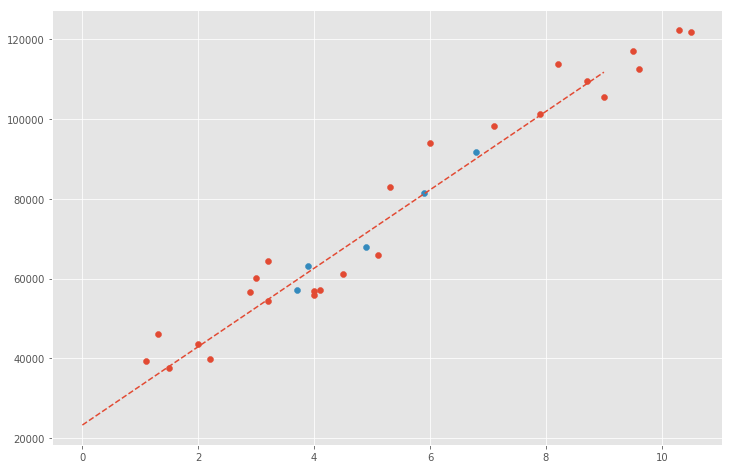

In [197]:
plt.scatter(X, y, label="Training Data")
plt.scatter(X_hold, y_hold, label="Test Data")

f = lambda x_: m*x_ + b
x = list(range(int(max(X))))
gd_y = [f(i) for i in x]
plt.plot(x, gd_y, label="Gradient Descent model", linestyle='dashed')

None

### Plot confidence interval for the predictions using gradient descent model

### Plot prediction interval for the gradient descent model